支持向量机的核函数

In [31]:
#导入numpy
import numpy as np
#导入画图工具
import matplotlib.pyplot as plt

In [32]:
#导入支持向量机svm
from sklearn import svm
#导入数据集生成工具
from sklearn.datasets import make_blobs

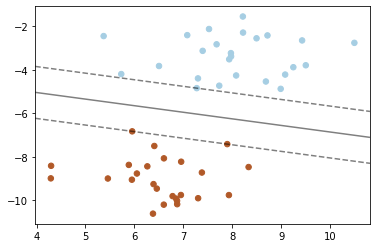

In [33]:
# 先创建50个数据点，让它们分为两类
X, y = make_blobs(n_samples=50, centers=2, random_state=6)

# 创建一个线性内核的支持向量机模型
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
# 把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

结果分析：
可以看到，在分类器两侧分别有两条虚线，那些正好压在虚线上的数据点，就是我们所说的支持向量。本例使用的方法称为“最大边界间隔超平面”。指的是说中间这条实线（在高维数据中是一个超平面），和所有支持向量之间的距离，都是最大的。

构造kernel=RBF的线性内核的svm模型

C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


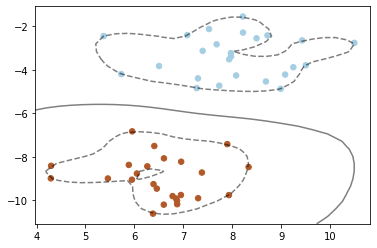

In [34]:
# 创建一个RBF内核的支持向量机模型
clf_rbf = svm.SVC(kernel='rbf', C=1000)
clf_rbf.fit(X, y)
# 把数据点画出来
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

#建立图像坐标
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf_rbf.decision_function(xy).reshape(XX.shape)

# 把分类的决定边界画出来
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf_rbf.support_vectors_[:, 0], clf_rbf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()

结果分析：
可以看到分类器的样子变得完全不一样了，这是因为当我们使用RBF内核的时候，数据点之间的距离是用如下公式来计算的
公式中的x1和x2代表两个不同的数据点，而||x1-x2||代表两点之间的欧几里得距离，γ（gamma）是用来空值rbf内核宽度的参数，也就是图中实线和两条虚线的距离。

SVM的核函数和参数选择
1.核函数对比：
为了直观体验不同内核的SVM算法在分类中的不同表现，我们画个图像进行展示：

C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


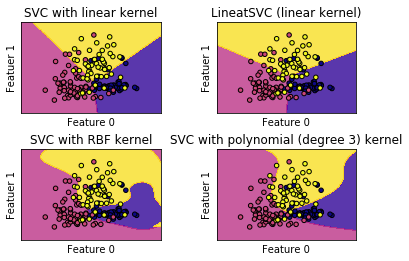

In [36]:
#导入红酒数据集
from sklearn.datasets import load_wine
#导入支持向量机svm
from sklearn import svm
#定义一个函数用来画图
def make_meshgrid(x,y,h=.02):
    x_min,x_max = x.min() - 1,x.max() + 1
    y_min,y_max = y.min() - 1,y.max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    return xx,yy
#定义一个绘制等高线的函数
def plot_contours(ax,clf,xx,yy,**params):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx,yy,Z,**params)
    return out

#使用酒的数据集
wine = load_wine()
#选取数据集的前两个特征
X = wine.data[:, :2]
y = wine.target

C = 1.0 #svm的正则化参数
models = (svm.SVC(kernel='linear',C=C),svm.LinearSVC(C=C),svm.SVC(kernel='rbf',gamma=0.7,C=C),svm.SVC(kernel='poly',degree=3,C=C))
models = (clf.fit(X,y) for clf in models)

#设定图题
titles = ('SVC with linear kernel','LineatSVC (linear kernel)','SVC with RBF kernel','SVC with polynomial (degree 3) kernel')

#设定一个子图形的个数和排列方式
flg, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4,hspace=0.4)
#使用前面定义的函数进行画图
X0,X1, = X[:, 0],X[:, 1]
xx,yy = make_meshgrid(X0,X1)

for clf,title,ax in zip(models,titles,sub.flatten()):
    plot_contours(ax,clf,xx,yy,cmap=plt.cm.plasma,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.plasma,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Featuer 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
#将图型显示出来
plt.show()

结果分析：从图中可以看到，线性内核的SVC与linearSVC得到的结果非常近似，但仍然有一点点差别。
差别原因：linearSVC对L2范数进行最小化，而线性内核的SVC是对L1范数进行最小化。
不论如何，linearSVC和线性内核的SVC生成的决定边界都是线性的，在更高维数据集中将会是相交的超平面。而RBF内核的SVC和polynomial内核的SVC分类器的决定边界则完全不是线性的。
非线性原因:决定它们边界形状的，就是它们的参数，在polynomial内核的SVC中，起决定性作用的参数就是degree和正则化参数C，在本例中我们使用的degree为3，也就是对原始数据集的特征进行乘3次方操作。
RBF内核的SVC中，起决定作用的是正则化参数C和参数gamma，接下来讲gamma参数。

svm的gamma参数调节：

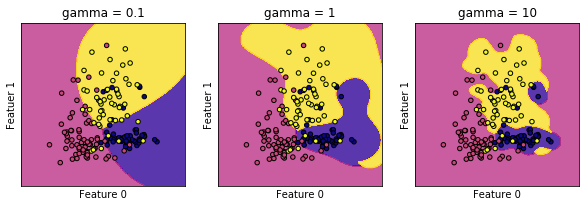

In [37]:
C = 1.0 #svm的正则化参数
models = (svm.SVC(kernel='rbf',gamma=0.1,C=C),svm.SVC(kernel='rbf',gamma=1,C=C),svm.SVC(kernel='rbf',gamma=10,C=C))
models = (clf.fit(X,y) for clf in models)

#设定图题
titles = ('gamma = 0.1','gamma = 1','gamma = 10',)

#设定一个子图形的个数和排列方式
flg, sub = plt.subplots(1,3,figsize = (10,3))
#使用定义好的函数进行画图
X0,X1, = X[:, 0],X[:, 1]
xx,yy = make_meshgrid(X0,X1)

for clf,title,ax in zip(models,titles,sub.flatten()):
    plot_contours(ax,clf,xx,yy,cmap=plt.cm.plasma,alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.plasma,s=20,edgecolors='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Featuer 1')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
#将图型显示出来
plt.show()

结果分析：
可以看出
1.从左至右gamma值从0.1增加到10，gamma值越小，则RBF内核的直径越大，这样就会有更多的点被模型圈进决定边界中，所以决定边界也就越平滑，这时的模型也就越简单；
2.随着参数的增加，模型则更倾向于把每一个点都放到相应的决定边界中，这时模型的复杂度也相应提高了。所以gamma值越小，模型越倾斜于欠拟合，而gamma值越大，则模型越倾向于出现过拟合的问题。

支持向量机实例-----对波士顿房价进行回归分析

In [47]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


波士顿房价数据集：数据集中有506个样本，每个样本有13个特征变量。还有一个叫做中位数的第14个变量，这个变量就是数据集中的target。

In [48]:
#使用SVR进行建模
#导入数据集拆分工具
from sklearn.model_selection import train_test_split
#建立训练数据集和测试数据集
X,y = boston.data,boston.target
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)
print('\n\n\n')
print('代码运行结果')
print('====================================\n')
#打印训练集和测试集的形态
print(X_train.shape)
print(X_test.shape)
print('\n====================================')
print('\n\n\n')





代码运行结果

(379, 13)
(127, 13)







In [49]:
#分别尝试一下两种核函数：“linear”和“rbf”
from sklearn.svm import SVR
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    print(kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train, y_train)))
    print(kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test, y_test)))

linear 核函数的模型训练集得分：0.709
linear 核函数的模型测试集得分：0.696
rbf 核函数的模型训练集得分：0.145
rbf 核函数的模型测试集得分：0.001


C:\Users\rosehyr\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


结果分析：
从结果看到，两种核函数的模型得分都不能令人满意。特别是rbf核函数更糟糕。
原因：
思考：会不会是数据集各个特征之间的量级差比较远？
因为SVM对数据预处理的要求比较高，如果数据特征量级差较大，我们就需要进行预处理。所以先用图形可视化一下数据集中各个特征的数量级是什么情况：

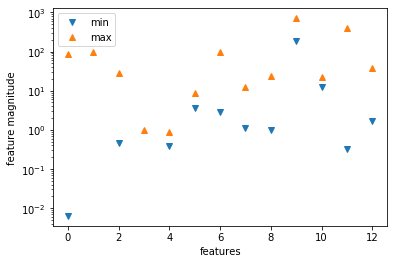

In [51]:
#将特征数值中的最小值和最大值用散点图画出来
plt.plot(X.min(axis=0),'v',label='min')
plt.plot(X.max(axis=0),'^',label='max')
#设定纵坐标为对数形式
plt.yscale('log')
#设置图注位置为最佳
plt.legend(loc='best')
#设置横纵轴坐标
plt.xlabel('features')
plt.ylabel('feature magnitude')

#显示图形
plt.show()

In [ ]:
结果分析：
果然，各个特征的量级差异还是比较大的，第一个特征值最小值在10^-2,而最大值达到了10^2
 
因此，进行数据预处理：

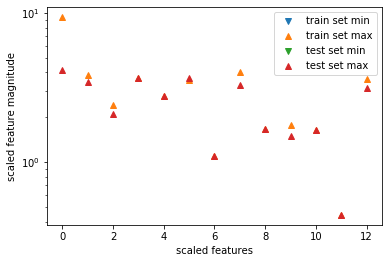

In [52]:
#导入数据预处理工具
from sklearn.preprocessing import StandardScaler
#对训练集和测试集进行数据预处理
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
#将预处理后的数据特征最大值和最小值用散点图表示出来
plt.plot(X_train_scaled.min(axis=0),'v',label='train set min')
plt.plot(X_train_scaled.max(axis=0),'^',label='train set max')
plt.plot(X_test_scaled.min(axis=0),'v',label='test set min')
plt.plot(X_test_scaled.max(axis=0),'^',label='test set max')
plt.yscale('log')
#设置图注位置
plt.legend(loc='best')
#设置横纵坐标
plt.xlabel('scaled features')
plt.ylabel('scaled feature magnitude')
#显示图形
plt.show()

结果分析：可以看出，经过了预处理，特征量级差异减小很多。
再次用经过预处理的数据来训练模型，看看结果会有什么不同：

In [53]:
#用预处理后的数据重新训练模型
for kernel in ['linear','rbf']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train_scaled, y_train)
    print('数据预处理后',kernel,'核函数的模型训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
    print('数据预处理后',kernel,'核函数的模型测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

数据预处理后 linear 核函数的模型训练集得分：0.706
数据预处理后 linear 核函数的模型测试集得分：0.698
数据预处理后 rbf 核函数的模型训练集得分：0.665
数据预处理后 rbf 核函数的模型测试集得分：0.695


结果分析：
从结果可以看到，“linear”内核的SVR得分变化不大，而“rbf“内核的SVR得分有了巨大提升。尤其是测试集的得分，从0.001分直接提升到0.694.
思考一下，如果我们进一步调整“rbf”内核的svr模型参数，会不会让它的表现进一步提升呢？
和SVC一样，SVR也有gamma和C两个参数，进行调参：

In [54]:
#设置模型的C参数核Gamma参数
svr = SVR(C=100, gamma=0.1)
svr.fit(X_train_scaled, y_train)
print('调节参数后的模型在训练集得分：{:.3f}'.format(
        svr.score(X_train_scaled, y_train)))
print('调节参数后的模型在测试集得分：{:.3f}'.format(
        svr.score(X_test_scaled, y_test)))

调节参数后的模型在训练集得分：0.966
调节参数后的模型在测试集得分：0.894


结果分析：
效果还不错，可以看到通过调节参数，“rbf”内核的SVR模型在训练集的得分已经高达0.966，测试集得分也不低。